In [9]:

vcf_file_address =  "22_5smp.vcf" #"a/22_2k.vcf" #  "22_all.vcf"  "a/22_2k.vcf" #  "a/22_2k.vcf"#   #"22_allps_200.vcf"  
vcf_file = open(vcf_file_address,'r');


blockid_blocks_s1 = []
allele_blocks_s1 = []
varpos_blocks_s1 = []


blockid_blocks_s2 = []
allele_blocks_s2 = []
varpos_blocks_s2 = []

blockid_blocks_s3 = []
allele_blocks_s3 = []
varpos_blocks_s3 = []

blockid_blocks_s4 = []
allele_blocks_s4 = []
varpos_blocks_s4 = []

var_blockids1_blocks_s2 = []   # for each var in s2, shows the s1 blockid
var_blockids1_blocks_s3 = []   # for each var in s3, shows the s1 blockid
var_blockids1_blocks_s4 = []   # for each var in s4, shows the s1 blockid


# for parental that it's only one block per chr so it doesn't have blockid
alleles_s5 = []
varposs_s5 = []


varposs_all = []

num_weird_occurs=0

var_lines_list = []

header_lines_list = []
for line in vcf_file:
    line_strip = line.strip()
    
    if line_strip.startswith('#'):
        header_lines_list.append(line_strip)
        sample_names = line_strip.split('\t')[9:]   # last line of header contains sample name
        #print(sample_names)
        
    else:
        line_parts = line_strip.split('\t')
        var_lines_list.append(line_parts)
        #gt_flags, s1, sss, ss, s2, s5 = line_parts[8:]
        gt_flags, s1, s2,s3,s4, s5 = line_parts[8:]       # hifi-whatshp illumina-whatshp hifi-hapcut illumina-hapcut true

        varpos = int(line_parts[1])                 # variant position
        
        varposs_all.append(varpos)
        gt_flags_split = gt_flags.split(":")
        
        if "PS" in gt_flags_split:
            idx_ps = gt_flags.split(":").index("PS")
            idx_gt = gt_flags.split(":").index("GT")
            

                                                 ## s5- parental - last sample in the vcf file
            split_s5 = s5.split(":")
            allele_s5 = split_s5[idx_gt]
            blockid_s5 = split_s5[idx_ps]
            
            if allele_s5 == "0|1" or allele_s5 == "1|0":
                alleles_s5.append(int(allele_s5[0]))
                varposs_s5.append(varpos)

            
            
                                                ###  sample 1 ###
            split_s1 = s1.split(":")
            blockid_s1 = split_s1[idx_ps]
            allele_s1 = split_s1[idx_gt]
            

            if blockid_s1 == ".":                                 # unphased variants for sample one
                pass
            
            elif blockid_s1 in blockid_blocks_s1:
                assert allele_s1[1] == "|", "allele_s1[1] should be | and so phased. A non-phased variant is in the phase block"
                
                #if blockid_s1 == previous_blockid_s1: previous_blockid_s1_idx has been defined in previous variant which is the last idx
                if blockid_s1 != previous_blockid_s1:  
                    # weird situation happens for whatshap in which two variants are in the same block but in between there is/are other phaseblock(s)
                    # note that the unphased variants are ignored sooner and are not considered here
                    previous_blockid_s1_idx = blockid_blocks_s1.index(blockid_s1)
                    #print("two variants are in the same block, but far from each other",varpos)                
                    num_weird_occurs+=1

                allele_blocks_s1[previous_blockid_s1_idx].append( int(allele_s1[0]) )
                varpos_blocks_s1[previous_blockid_s1_idx].append( varpos ) 

                
            else:                                                  # A new block started, it can be the first block
                
                allele_blocks_s1.append( [int(allele_s1[0])] )     # alleles of a phase block (all vars are hetrozygous) 
                varpos_blocks_s1.append( [varpos] )                # variant posistion of a block
                blockid_blocks_s1.append( blockid_s1 )             # add the blockid of the first var  to the list of blockids
                
                previous_blockid_s1 = blockid_s1
                previous_blockid_s1_idx = len(blockid_blocks_s1)-1  # the index of the last block id
                


                
       
    
                                                ###  sample 2 ###
            split_s2 = s2.split(":")
            blockid_s2 = split_s2[idx_ps]
            allele_s2 = split_s2[idx_gt]
            if blockid_s2 == ".":
                pass
            elif blockid_s2 in blockid_blocks_s2:
                assert allele_s2[1] == "|", "allele_s2[1] should be | and so phased. A non-phased variant is in the phase block"
                
                if blockid_s2 != previous_blockid_s2:  
                    previous_blockid_s2_idx = blockid_blocks_s2.index(blockid_s2)
                    num_weird_occurs+=1
                allele_blocks_s2[previous_blockid_s2_idx].append( int(allele_s2[0]) )
                varpos_blocks_s2[previous_blockid_s2_idx].append( varpos ) 
                var_blockids1_blocks_s2[previous_blockid_s2_idx].append( blockid_s1 )
                
            else:                                                 # A new block started   (it can be the first block)
                allele_blocks_s2.append( [int(allele_s2[0])] )     # alleles of a phase block (all vars are hetrozygous) 
                varpos_blocks_s2.append( [varpos] )                # variant posistion of a block
                blockid_blocks_s2.append( blockid_s2 )             # add the blockid of the first var  to the list of blockids
                var_blockids1_blocks_s2.append( [blockid_s1] )  
                previous_blockid_s2 = blockid_s2
                previous_blockid_s2_idx = len(blockid_blocks_s2)-1   # the index of the last block id
                

                                                ###  sample 3 ###
            split_s3 = s3.split(":")
            blockid_s3 = split_s3[idx_ps]
            allele_s3 = split_s3[idx_gt]
            if blockid_s3 == ".":
                pass
            elif blockid_s3 in blockid_blocks_s3:
                assert allele_s3[1] == "|", "allele_s3[1] should be | and so phased. A non-phased variant is in the phase block"
                
                if blockid_s3 != previous_blockid_s3:  
                    previous_blockid_s3_idx = blockid_blocks_s3.index(blockid_s3)
                    num_weird_occurs+=1
                allele_blocks_s3[previous_blockid_s3_idx].append( int(allele_s3[0]) )
                varpos_blocks_s3[previous_blockid_s3_idx].append( varpos ) 
                var_blockids1_blocks_s3[previous_blockid_s3_idx].append( blockid_s1 )
                
            else:                                                 # A new block started   (it can be the first block)
                allele_blocks_s3.append( [int(allele_s3[0])] )     # alleles of a phase block (all vars are hetrozygous) 
                varpos_blocks_s3.append( [varpos] )                # variant posistion of a block
                blockid_blocks_s3.append( blockid_s3 )             # add the blockid of the first var  to the list of blockids
                var_blockids1_blocks_s3.append( [blockid_s1] )  
                previous_blockid_s3 = blockid_s3
                previous_blockid_s3_idx = len(blockid_blocks_s3)-1   # the index of the last block id
                
   
    
                                                ###  sample 3 ###
            split_s4 = s4.split(":")
            blockid_s4 = split_s4[idx_ps]
            allele_s4 = split_s4[idx_gt]
            if blockid_s4 == ".":
                pass
            elif blockid_s4 in blockid_blocks_s4:
                assert allele_s4[1] == "|", "allele_s4[1] should be | and so phased. A non-phased variant is in the phase block"
                
                if blockid_s4 != previous_blockid_s4:  
                    previous_blockid_s4_idx = blockid_blocks_s4.index(blockid_s4)
                    num_weird_occurs+=1
                allele_blocks_s4[previous_blockid_s4_idx].append( int(allele_s4[0]) )
                varpos_blocks_s4[previous_blockid_s4_idx].append( varpos ) 
                var_blockids1_blocks_s4[previous_blockid_s4_idx].append( blockid_s1 )
                
            else:                                                 # A new block started   (it can be the first block)
                allele_blocks_s4.append( [int(allele_s4[0])] )     # alleles of a phase block (all vars are hetrozygous) 
                varpos_blocks_s4.append( [varpos] )                # variant posistion of a block
                blockid_blocks_s4.append( blockid_s4 )             # add the blockid of the first var  to the list of blockids
                var_blockids1_blocks_s4.append( [blockid_s1] )  
                previous_blockid_s4 = blockid_s4
                previous_blockid_s4_idx = len(blockid_blocks_s4)-1   # the index of the last block id
                




print("Num phaseblocks in sample one is ",len(allele_blocks_s1))
print("Num phaseblocks in sample two is ",len(allele_blocks_s2))
print("Num phaseblocks in sample three is ",len(allele_blocks_s3))
print("Num phaseblocks in sample four is ",len(allele_blocks_s4))
print("Num vars in sample five-parental is ",len(varposs_s5))
print("Num all vars is ",len(varposs_all))

print("number of occurance of weird case (=two variants are in the same block, but far from each other) ", num_weird_occurs)
 

Num phaseblocks in sample one is  252
Num phaseblocks in sample two is  251
Num phaseblocks in sample three is  6771
Num phaseblocks in sample four is  6905
Num vars in sample five-parental is  20903
Num all vars is  71923
number of occurance of weird case (=two variants are in the same block, but far from each other)  535


In [10]:
# for test code
# cd /Volumes/work/myjupyter/phaseyou
#grep "46014176" 22_all.vcf

#blockid_blocks_s2.index("46014176")
#print(allele_blocks_s2[5568],"\n",varpos_blocks_s2[5568])


In [11]:
#%pwd
num_phased_s1=0
for varpos_block_s1 in varpos_blocks_s1:
    num_phased_s1+=len(varpos_block_s1)
    if len(varpos_block_s1)<2:
        print("small",varpos_block_s1)
print(num_phased_s1)


# num_phased_s2=0
# for allele_block_s2 in allele_blocks_s2:
#     num_phased_s2+=len(allele_block_s2)
#     if len(allele_block_s2)<2:
#         print("small,s2",len(allele_block_s2))
# print(num_phased_s2)

num_phased_a=0
for a in var_blockids1_blocks_s2:
    num_phased_a+=len(a)
print(num_phased_a)   
#len(var_blockids1_blocks_s2[100])
#print(var_blockids1_blocks_s2[0])

small [31182721]
small [36247796]
small [47917314]
37559
39025


In [12]:
intersected_blocks_idins1_s2=[] # for each block in s2, the corresponding s1 block id

for var_blockids1_blocks_s2_i in var_blockids1_blocks_s2:
    var_blockids1_blocks_s2_i_set=set(var_blockids1_blocks_s2_i)
    
    if '.' in var_blockids1_blocks_s2_i_set:
        var_blockids1_blocks_s2_i_set.discard('.')
        
    if len(var_blockids1_blocks_s2_i_set)==1:
        intersected_idins1_s2=list(var_blockids1_blocks_s2_i_set)[0]
    if len(var_blockids1_blocks_s2_i_set)==0:
        intersected_idins1_s2=0
    if len(var_blockids1_blocks_s2_i_set)>1:
        # find the most frequent blockid in the phaseblock
        intersected_idins1_s2=max(var_blockids1_blocks_s2_i_set, key=var_blockids1_blocks_s2_i.count) 
    
        
    intersected_blocks_idins1_s2.append(intersected_idins1_s2)


In [13]:
intersected_blocks_idins1_s3=[] # for each block in s3, the corresponding s1 block id

for var_blockids1_blocks_s3_i in var_blockids1_blocks_s3:
    var_blockids1_blocks_s3_i_set=set(var_blockids1_blocks_s3_i)
    
    if '.' in var_blockids1_blocks_s3_i_set:
        var_blockids1_blocks_s3_i_set.discard('.')
        
    if len(var_blockids1_blocks_s3_i_set)==1:
        intersected_idins1_s3=list(var_blockids1_blocks_s3_i_set)[0]
    if len(var_blockids1_blocks_s3_i_set)==0:
        intersected_idins1_s3=0
    if len(var_blockids1_blocks_s3_i_set)>1:
        # find the most frequent blockid in the phaseblock
        intersected_idins1_s3=max(var_blockids1_blocks_s3_i_set, key=var_blockids1_blocks_s3_i.count) 
    
        
    intersected_blocks_idins1_s3.append(intersected_idins1_s3)


In [14]:
intersected_blocks_idins1_s4=[] # for each block in s4, the corresponding s1 block id

for var_blockids1_blocks_s4_i in var_blockids1_blocks_s4:
    var_blockids1_blocks_s4_i_set=set(var_blockids1_blocks_s4_i)
    
    if '.' in var_blockids1_blocks_s4_i_set:
        var_blockids1_blocks_s4_i_set.discard('.')
        
    if len(var_blockids1_blocks_s4_i_set)==1:
        intersected_idins1_s4=list(var_blockids1_blocks_s4_i_set)[0]
    if len(var_blockids1_blocks_s4_i_set)==0:
        intersected_idins1_s4=0
    if len(var_blockids1_blocks_s4_i_set)>1:
        # find the most frequent blockid in the phaseblock
        intersected_idins1_s4=max(var_blockids1_blocks_s4_i_set, key=var_blockids1_blocks_s4_i.count) 
    
        
    intersected_blocks_idins1_s4.append(intersected_idins1_s4)


In [15]:
#print(blockid_blocks_s1)
#for i in range(len(allele_blocks_s1)):
#    print(len(allele_blocks_s1[i]))
    
#print(blockid_blocks_s2)
#for i in range(len(allele_blocks_s2)):
#    print(len(allele_blocks_s2[i]))

In [16]:

# re-ordering  the phase block allel based on parent

## important ## 
# if we don't have the parental , how we can reorder


number_phaseblocks_s1= len(allele_blocks_s1)

#allele_blocks_s1_new=list(allele_blocks_s1)
for block_i in range(number_phaseblocks_s1): # 
   
    allele_block_s1=allele_blocks_s1[block_i]
    varpos_block_s1=varpos_blocks_s1[block_i]


    similiar_count=0
    diss_count=0
    for var_i, varpos in enumerate(varpos_block_s1):
        allele_s1= allele_block_s1[var_i]
        
        if varpos in varposs_s5:
            allele_s5= alleles_s5[varposs_s5.index(varpos)]
            if allele_s1 == allele_s5:
                similiar_count+=1
            else: 
                diss_count+=1
                
    #print(similiar_count, diss_count)          
    if similiar_count < diss_count:
        allele_block_s1_reordered = [1-i for i in allele_block_s1] # converting 0->1 and 1->0
        allele_blocks_s1[block_i]=allele_block_s1_reordered
        #print("it needs to re-order")
    
#         allele_block_s1_new = [1-i for i in allele_block_s1]
#         allele_blocks_s1_new[block_i]=allele_block_s1_new
        


In [17]:
number_phaseblocks_s2= len(allele_blocks_s2)

for block_i in range(number_phaseblocks_s2): # 
   
    allele_block_s2=allele_blocks_s2[block_i]
    varpos_block_s2=varpos_blocks_s2[block_i]

    intersected_idins1_s2=intersected_blocks_idins1_s2[block_i]
    if intersected_idins1_s2 !=0:
        block_indx_s1= blockid_blocks_s1.index(intersected_idins1_s2)
    varpos_block_s1=varpos_blocks_s1[block_indx_s1]
    allele_block_s1=allele_blocks_s1[block_indx_s1]
    
    intersect_varpos=set(varpos_block_s1) & set(varpos_block_s2)
    similiar_count=0
    for varpos in intersect_varpos:
        allele_s1= allele_block_s1[varpos_block_s1.index(varpos)]
        allele_s2= allele_block_s2[varpos_block_s2.index(varpos)]
        if allele_s1==allele_s2: similiar_count+=1
    #print(similiar_count/len(intersect_varpos))
    if similiar_count < len(intersect_varpos)/2:
        #print("need", similiar_count)
        allele_block_s2_reordered= [1-i for i in allele_block_s2]
        allele_blocks_s2[block_i]=allele_block_s2_reordered
        #print("it needs to re-order")



In [18]:
number_phaseblocks_s3= len(allele_blocks_s3)

for block_i in range(number_phaseblocks_s3): # 
   
    allele_block_s3=allele_blocks_s3[block_i]
    varpos_block_s3=varpos_blocks_s3[block_i]

    intersected_idins1_s3=intersected_blocks_idins1_s3[block_i]
    if intersected_idins1_s3 !=0:
        block_indx_s1= blockid_blocks_s1.index(intersected_idins1_s3)
    varpos_block_s1=varpos_blocks_s1[block_indx_s1]
    allele_block_s1=allele_blocks_s1[block_indx_s1]
    
    intersect_varpos=set(varpos_block_s1) & set(varpos_block_s3)
    similiar_count=0
    for varpos in intersect_varpos:
        allele_s1= allele_block_s1[varpos_block_s1.index(varpos)]
        allele_s3= allele_block_s3[varpos_block_s3.index(varpos)]
        if allele_s1==allele_s3: similiar_count+=1
    #print(similiar_count/len(intersect_varpos))
    if similiar_count < len(intersect_varpos)/2:
        #print("need", similiar_count)
        allele_block_s3_reordered= [1-i for i in allele_block_s3]
        allele_blocks_s3[block_i]=allele_block_s3_reordered
        #print("it needs to re-order")


        
number_phaseblocks_s4= len(allele_blocks_s4)

for block_i in range(number_phaseblocks_s4): # 
   
    allele_block_s4=allele_blocks_s4[block_i]
    varpos_block_s4=varpos_blocks_s4[block_i]

    intersected_idins1_s4=intersected_blocks_idins1_s4[block_i]
    if intersected_idins1_s4 !=0:
        block_indx_s1= blockid_blocks_s1.index(intersected_idins1_s4)
    varpos_block_s1=varpos_blocks_s1[block_indx_s1]
    allele_block_s1=allele_blocks_s1[block_indx_s1]
    
    intersect_varpos=set(varpos_block_s1) & set(varpos_block_s4)
    similiar_count=0
    for varpos in intersect_varpos:
        allele_s1= allele_block_s1[varpos_block_s1.index(varpos)]
        allele_s4= allele_block_s4[varpos_block_s4.index(varpos)]
        if allele_s1==allele_s4: similiar_count+=1
    #print(similiar_count/len(intersect_varpos))
    if similiar_count < len(intersect_varpos)/2:
        #print("need", similiar_count)
        allele_block_s4_reordered= [1-i for i in allele_block_s4]
        allele_blocks_s4[block_i]=allele_block_s4_reordered
        #print("it needs to re-order")



In [19]:
matrix_row_lists=[]
for varpos in varposs_all:
    # for increasing the speed we can use the information that the phase blocks are in order.
    # but not for those weird phase block


    allele_s1='.'
    blockid_s1='.'
    for block_i_s1 in range(len(blockid_blocks_s1)):
        allele_block_s1 = allele_blocks_s1[block_i_s1]
        varpos_block_s1 = varpos_blocks_s1[block_i_s1]

        if varpos in varpos_block_s1:
            allele_s1 = allele_block_s1[varpos_block_s1.index(varpos)]
            blockid_s1 = blockid_blocks_s1[block_i_s1]
            break # when var is found, no need to continue for loop

            
    allele_s2='.'
    blockid_s2='.'
    for block_i_s2 in range(len(blockid_blocks_s2)):
        allele_block_s2 = allele_blocks_s2[block_i_s2]
        varpos_block_s2 = varpos_blocks_s2[block_i_s2]

        if varpos in varpos_block_s2:
            allele_s2 = allele_block_s2[varpos_block_s2.index(varpos)]
            blockid_s2 = blockid_blocks_s2[block_i_s2]
            break # when var is found, no need to continue for loop

    allele_s3='.'
    blockid_s3='.'
    for block_i_s3 in range(len(blockid_blocks_s3)):
        allele_block_s3 = allele_blocks_s3[block_i_s3]
        varpos_block_s3 = varpos_blocks_s3[block_i_s3]

        if varpos in varpos_block_s3:
            allele_s3 = allele_block_s3[varpos_block_s3.index(varpos)]
            blockid_s3 = blockid_blocks_s3[block_i_s3]
            break # when var is found, no need to continue for loop

    allele_s4='.'
    blockid_s4='.'
    for block_i_s4 in range(len(blockid_blocks_s4)):
        allele_block_s4 = allele_blocks_s4[block_i_s4]
        varpos_block_s4 = varpos_blocks_s4[block_i_s4]

        if varpos in varpos_block_s4:
            allele_s4 = allele_block_s4[varpos_block_s4.index(varpos)]
            blockid_s4 = blockid_blocks_s4[block_i_s4]
            break # when var is found, no need to continue for loop

    
            
    if varpos in varposs_s5:
        allele_s5 = alleles_s5[varposs_s5.index(varpos)]
    else: allele_s5= '.'

    if not (allele_s1=='.' and allele_s2=='.' and allele_s3=='.' and allele_s4=='.' and allele_s5=='.'): 
        matrix_row_list=[str(varpos),str(allele_s1)+":"+str(blockid_s1),
                         str(allele_s2)+":"+str(blockid_s2),str(allele_s3)+":"+str(blockid_s3),
                         str(allele_s4)+":"+str(blockid_s4), str(allele_s5)] 
        matrix_row_lists.append(matrix_row_list)

        
# one option can be for loop over blockid_blocks_s1 instead of varposs_all, then search in  blockid_blocks_s1 also for printing sort them to overcome weird phase block
# the issue will be for those variant that are not phased in blockid_blocks_s1 but in blockid_blocks_s2


In [20]:
result_consensus =[]

changes_varpos_pre=[]
changes_varpos_next=[]

matrix_row_lists_prd =[]
for row_i, matrix_row_list in enumerate(matrix_row_lists):
    varpos, s1, s2, s3, s4, allele_s5 = matrix_row_list
    
    allele_s1='.';blockid_s1='.'
    allele_s2='.';blockid_s2='.'
    allele_s3='.';blockid_s3='.'
    allele_s4='.';blockid_s4='.'
    if s1 != '.:.':
        allele_s1 = s1[0]
        blockid_s1 = s1[2:]
        blockid_s1_last_known = blockid_s1
        
    if s2 != '.:.':
        allele_s2 = s2[0]
        blockid_s2 = s2[2:]        
    if s3 != '.:.':
        allele_s3 = s3[0]
        blockid_s3 = s3[2:]
    if s4 != '.:.':
        allele_s4 = s4[0]
        blockid_s4 = s4[2:]
    
    allele_s_p = allele_s1
    blockid_s_p = blockid_s1
    
    if allele_s1 == '.' and allele_s2 != ".":

        if blockid_s2 == blockid_s1_last_known:
            allele_s_p = allele_s2
            blockid_s_p = blockid_s2
            changes_varpos_pre.append(varpos)
        else:             # check next variant, 

            blockid_s1_next = matrix_row_lists[row_i+1][1][2:]
            blockid_s2_next = matrix_row_lists[row_i+1][2][2:]
            if blockid_s2_next == blockid_s2:
                allele_s_p = allele_s2
                blockid_s_p = blockid_s2 
                changes_varpos_next.append(varpos)

            else:
                print("blockIds of s1 and s2 don't match: ",varpos,allele_s_p,blockid_s_p,)
            
    if allele_s1 != '.' :
        if allele_s1 != allele_s2 and allele_s2 == allele_s3 and allele_s3 == allele_s4:
            result_consensus.append(allele_s1 == allele_s5)
            print(varpos, allele_s1 == allele_s5)
            allele_s_p = str(1-int(allele_s_p))

   
            
            
        
    matrix_row_list_prd = [str(varpos),str(allele_s1)+":"+str(blockid_s1),
                                  str(allele_s2)+":"+str(blockid_s2),str(allele_s3)+":"+str(blockid_s3),
                                  str(allele_s4)+":"+str(blockid_s4), str(allele_s5),
                                  str(allele_s_p)+":"+str(blockid_s_p)] 
    
    matrix_row_lists_prd.append(matrix_row_list_prd)
    
    
    

16102810 False
16103146 False
16103299 False
16115554 False
16117006 False
16203542 False
16345401 False
16347827 False
16351604 False
16442657 False
16490618 True
16499684 False
16499788 False
16506873 True
16512581 False
16528995 True
16553221 True
16558766 True
16561186 True
16564036 True
16590588 False
16623522 False
16664149 True
16864037 False
16864095 False
16864325 False
16864351 False
16864741 False
16882859 True
16883072 True
16883221 True
16884830 True
17392568 False
17614938 False
17617072 False
17627489 False
17760350 False
17760620 False
17893503 False
18309097 False
18359712 False
18532438 False
18605939 False
18764533 True
18764558 False
18764739 False
18770724 True
18807561 False
18807958 False
18830799 False
18830821 False
18831309 False
18831620 False
18832024 False
18832515 False
18837115 False
18837431 False
18837489 False
18838215 False
18838256 False
18839101 False
18840046 False
18840051 False
18840378 False
18840440 False
18841317 False
18841329 False
18841614 

In [21]:
sum(result_consensus), len(result_consensus)

(23, 298)

In [15]:
print(len(changes_varpos_pre),len(changes_varpos_next))

252 0


In [16]:
changes_varpos_next[:20]

[]

In [22]:
matrix_address=vcf_file_address+"_matrix5_p2.txt"

matrix_file=open(matrix_address,'w');
matrix_file.write("\t\t".join(["Pos","HiFiWsp","HiFiHpct","IllmWsp","IllmHpct","parental","predicted"])+"\n") # "Pos","ONT","CLR","HiFi","Illm","parental"
for matrix_row_list in matrix_row_lists_prd:

        matrix_file.write("\t".join(matrix_row_list)+"\n")

matrix_file.close()
   

In [23]:
vcf_file_address

'22_5smp.vcf'

In [30]:

result_consensus =[]

changes_varpos_pre=[]
changes_varpos_next=[]

matrix_row_lists_prd =[]


cntr1=cntr2=cntr3=cntr4=cntr0=0
for row_i, matrix_row_list in enumerate(matrix_row_lists):
    varpos, s1, s2, s3, s4, allele_s5 = matrix_row_list
    
    allele_s1='.';blockid_s1='.'
    allele_s2='.';blockid_s2='.'
    allele_s3='.';blockid_s3='.'
    allele_s4='.';blockid_s4='.'
    if s1 != '.:.':
        allele_s1 = s1[0]
        blockid_s1 = s1[2:]
        blockid_s1_last_known = blockid_s1
        
    if s2 != '.:.':
        allele_s2 = s2[0]
        blockid_s2 = s2[2:]        
    if s3 != '.:.':
        allele_s3 = s3[0]
        blockid_s3 = s3[2:]
    if s4 != '.:.':
        allele_s4 = s4[0]
        blockid_s4 = s4[2:]
    
    allele_s_p = allele_s1
    blockid_s_p = blockid_s1
    
    if allele_s1 == '.' and allele_s2 != ".":
        
        

        if blockid_s2 == blockid_s1_last_known:
            allele_s_p = allele_s2
            blockid_s_p = blockid_s2
            changes_varpos_pre.append(varpos)
        else:             # check next variant, 

            blockid_s1_next = matrix_row_lists[row_i+1][1][2:]
            blockid_s2_next = matrix_row_lists[row_i+1][2][2:]
            if blockid_s2_next == blockid_s2:
                allele_s_p = allele_s2
                blockid_s_p = blockid_s2 
                changes_varpos_next.append(varpos)

            else:
                print("blockIds of s1 and s2 don't match: ",varpos,allele_s_p,blockid_s_p,)
            
    if allele_s1 != '.' :
        if allele_s1 != allele_s2 and allele_s2 == allele_s3 and allele_s3 == allele_s4:
            result_consensus.append(allele_s1 == allele_s5)
            #print(varpos, allele_s1 == allele_s5)
            allele_s_p = str(1-int(allele_s_p))
        
    if allele_s1 == '.' and allele_s5 != ".":
    #if allele_s5 != ".":
        
        
        cntr0+=1
        if allele_s2 != allele_s3 and allele_s3 == allele_s4 and allele_s4 == allele_s5:
            cntr1+=1
        if allele_s2 == allele_s3 and allele_s3 == allele_s4 and allele_s4 == allele_s5:
            cntr2+=1
        if allele_s2 == allele_s3 and allele_s3 == allele_s4 and allele_s4 != allele_s5:
            cntr3+=1
        if allele_s2 != allele_s3 and allele_s3 == allele_s4 and allele_s4 != allele_s5:
            cntr4+=1
        
        
print("s5", cntr0)         
print("s2!=s3=s4=s5:",cntr1,"s2=s3=s4=s5:",cntr2)
print("s2=s3=s4!=s5:",cntr3,"s2!=s3=s4!s5:",cntr4) 
        
#     matrix_row_list_prd = [str(varpos),str(allele_s1)+":"+str(blockid_s1),
#                                   str(allele_s2)+":"+str(blockid_s2),str(allele_s3)+":"+str(blockid_s3),
#                                   str(allele_s4)+":"+str(blockid_s4), str(allele_s5),
#                                   str(allele_s_p)+":"+str(blockid_s_p)] 
    
#     matrix_row_lists_prd.append(matrix_row_list_prd)
    
    
    

blockIds of s1 and s2 don't match:  25066913 . .
blockIds of s1 and s2 don't match:  25067393 . .
blockIds of s1 and s2 don't match:  25067451 . .
blockIds of s1 and s2 don't match:  36490708 . .
blockIds of s1 and s2 don't match:  36541000 . .
blockIds of s1 and s2 don't match:  36615084 . .
blockIds of s1 and s2 don't match:  36617974 . .
blockIds of s1 and s2 don't match:  36624461 . .
blockIds of s1 and s2 don't match:  36625910 . .
blockIds of s1 and s2 don't match:  36954192 . .
blockIds of s1 and s2 don't match:  37409576 . .
blockIds of s1 and s2 don't match:  37425201 . .
blockIds of s1 and s2 don't match:  39323324 . .
blockIds of s1 and s2 don't match:  40485477 . .
blockIds of s1 and s2 don't match:  43163714 . .
blockIds of s1 and s2 don't match:  43256165 . .
blockIds of s1 and s2 don't match:  43270877 . .
blockIds of s1 and s2 don't match:  43295268 . .
blockIds of s1 and s2 don't match:  43323582 . .
blockIds of s1 and s2 don't match:  43327579 . .
blockIds of s1 and s

In [27]:
len(matrix_row_lists)

42002

In [47]:
varpos_list_inmatrix=[]
for matrix_row_list in matrix_row_lists_prd:
    varpos_list_inmatrix.append(matrix_row_list[0])
print(len(varposs_all),len(varpos_list_inmatrix))

71923 42002


['22',
 '16050159',
 '.',
 'C',
 'T',
 '1178.67',
 '.',
 'DPB=104;EPPR=6.51267;GTI=0;MQMR=45.7419;NS=1;NUMALT=1;ODDS=271.398;PAIREDR=0.983871;PQR=0;PRO=0;QR=2231;RO=62;RPPR=4.27115;SRF=60;SRP=120.83;SRR=2;DP=416;AB=0.403846;ABP=11.3621;AF=0.5;AO=42;CIGAR=1X;DPRA=0;EPP=13.1438;LEN=1;MEANALT=1;MQM=43.7619;PAIRED=1;PAO=0;PQA=0;QA=1554;RPL=14;RPP=13.1438;RPR=28;RUN=1;SAF=42;SAP=94.2121;SAR=0;TYPE=snp;technology.illumina=1;AN=8;AC=4',
 'GT:DP:RO:QR:AO:QA:GL:PS:PQ:PD',
 '0|1:104:62:2231:42:1554:-138.29,0,-199.21:16050159:.:.',
 '0|1:104:.:.:.:.:.:16050159:16:1',
 '0|1:104:62:2231:42:1554:-138.29,0,-199.21:16050159:.:.',
 '1|0:104:.:.:.:.:.:16050159:100:35',
 './.:.:.:.:.:.:.:.:.:.']

In [87]:
var_lines_list_imp = []
for var_line_list in var_lines_list: # 
    var_line_list_part=var_line_list[:9]
    
        
#     matrix_row_list_prd = [str(varpos),str(allele_s1)+":"+str(blockid_s1),
#                                   str(allele_s2)+":"+str(blockid_s2),str(allele_s3)+":"+str(blockid_s3),
#                                   str(allele_s4)+":"+str(blockid_s4), str(allele_s5),
#                                   str(allele_s_p)+":"+str(blockid_s_p)] 
    varpos = var_line_list_part[1]
    if varpos in varpos_list_inmatrix:
        
        gt_flags = var_line_list[8]
        idx_ps = gt_flags.split(":").index("PS")
        idx_gt = gt_flags.split(":").index("GT")        
        s1 = var_line_list[9] # the rest of var info is got from the s1
        split_s1 = s1.split(":")
        
        var_idx = varpos_list_inmatrix.index(varpos)
        matrix_row_list_prd = matrix_row_lists_prd[var_idx]

        allele_s_p = matrix_row_list_prd[6][0]
        blockid_s_p = matrix_row_list_prd[6][2:]
        if allele_s_p != ".":
            split_s1[idx_gt] = allele_s_p+"|"+str(1-int(allele_s_p))
            split_s1[idx_ps] = blockid_s_p 
        else:
            split_s1[idx_gt]="./."
            split_s1[idx_ps]="."
            
        var_line_list_imp = split_s1
        var_line_list_part.append(":".join(var_line_list_imp))
        allele_s5 = matrix_row_list_prd[5]

        if allele_s5 != ".":
        
            var_line_list_part.append(allele_s5+"|"+str(1-int(allele_s5))+":.:.:.:.:.:.:.:.:1")
        else:
            var_line_list_part.append("./.:.:.:.:.:.:.:.:.:.")
            
        var_lines_list_imp.append(var_line_list_part)
        
        

In [83]:
var_line_list_imp

['1|0',
 '855',
 '738',
 '24717',
 '117',
 '3956',
 '-245.824,0,-2114.31',
 '16147398',
 '.',
 '.']

In [80]:
len(var_line_list_imp)

10

In [70]:
var_lines_list_imp[0]

['0|1',
 '104',
 '62',
 '2231',
 '42',
 '1554',
 '-138.29,0,-199.21',
 '16050159',
 '.',
 '.']

In [68]:
gt_flags

'GT:DP:RO:QR:AO:QA:GL:PS:PQ:PD'

In [49]:
var_line_list[8]

'GT:DP:RO:QR:AO:QA:GL:PS'

In [56]:
matrix_row_list_prd[6][:]

'1:50821579'

In [88]:
vcf_out_address=vcf_file_address+"_imp.vcf"

vcf_out_file=open(vcf_out_address,'w');

for header_line in header_lines_list:
    vcf_out_file.write(header_line)
    
for var_line_list in var_lines_list_imp:
    
    vcf_out_file.write("\t".join(var_line_list)+"\n")

vcf_out_file.close()
   
    




In [45]:
var_line_list_part

['22',
 '51243297',
 '.',
 'A',
 'T',
 '184.095',
 '.',
 'DPB=10;EPPR=3.0103;GTI=0;MQMR=13.5;NS=1;NUMALT=1;ODDS=7.93999;PAIREDR=0.5;PQR=0;PRO=0;QR=26;RO=2;RPPR=7.35324;SRF=1;SRP=3.0103;SRR=1;DP=40;AB=0;ABP=0;AF=1;AO=8;CIGAR=1X;DPRA=0;EPP=12.7819;LEN=1;MEANALT=1;MQM=25.25;PAIRED=1;PAO=0;PQA=0;QA=275;RPL=7;RPP=12.7819;RPR=1;RUN=1;SAF=0;SAP=20.3821;SAR=8;TYPE=snp;technology.illumina=1;AN=8;AC=8',
 'GT:DP:RO:QR:AO:QA:GL:PS']

In [35]:
var_lines_list_hifi = []
for var_line_list in var_lines_list: # 
    var_line_list_part=var_line_list[:9]
    
        
#     matrix_row_list_prd = [str(varpos),str(allele_s1)+":"+str(blockid_s1),
#                                   str(allele_s2)+":"+str(blockid_s2),str(allele_s3)+":"+str(blockid_s3),
#                                   str(allele_s4)+":"+str(blockid_s4), str(allele_s5),
#                                   str(allele_s_p)+":"+str(blockid_s_p)] 
    varpos = var_line_list_part[1]
    if varpos in varpos_list_inmatrix:
        
        gt_flags = var_line_list[8]
        idx_ps = gt_flags.split(":").index("PS")
        idx_gt = gt_flags.split(":").index("GT")        
        s1 = var_line_list[9] # the rest of var info is got from the s1
        split_s1 = s1.split(":")

        blockid_s1 = split_s1[idx_ps]
        allele_s1 = split_s1[idx_gt]
        
        if allele_s1 != "./.":

            var_idx = varpos_list_inmatrix.index(varpos)
            matrix_row_list_prd = matrix_row_lists_prd[var_idx]   

            var_line_list_imp = split_s1
            var_line_list_part.append(":".join(var_line_list_imp))

            allele_s5 = matrix_row_list_prd[5]
            if allele_s5 != ".":
                var_line_list_part.append(allele_s5+"|"+str(1-int(allele_s5))+":.:.:.:.:.:.:.:.:1")
            else:
                var_line_list_part.append("./.:.:.:.:.:.:.:.:.:.")

            var_lines_list_hifi.append(var_line_list_part)
        
        

NameError: name 'varpos_list_inmatrix' is not defined

In [36]:
vcf_out_address=vcf_file_address+"_hifi.vcf"

vcf_out_file=open(vcf_out_address,'w');

for header_line in header_lines_list:
    vcf_out_file.write(header_line)
    
for var_line_list in var_lines_list_hifi:
    
    vcf_out_file.write("\t".join(var_line_list)+"\n")

vcf_out_file.close()
   
    




In [37]:

diff_list=[]

for block_i in range(len(allele_blocks_s1)): # 
   
    allele_block_s1=allele_blocks_s1[block_i]
    varpos_block_s1=varpos_blocks_s1[block_i]


    for var_i, varpos in enumerate(varpos_block_s1):
        allele_s1= allele_block_s1[var_i]
        
        if varpos in varposs_s5:
            allele_s5= alleles_s5[varposs_s5.index(varpos)]
        
            if allele_s1!=allele_s5:
                
                for block_i in range(number_phaseblocks_s2): # 
   
                    allele_block_s2=allele_blocks_s2[block_i]
                    varpos_block_s2=varpos_blocks_s2[block_i]
                    if varpos in varpos_block_s2:
                        allele_s2= allele_block_s2[varpos_block_s2.index(varpos)]
                        diff_list.append([varpos,allele_s1,allele_s2,allele_s5])
                        #print([varpos,allele_s1,allele_s2,allele_s5],"\n")
                        break

                
                
                
                
                



In [38]:

diff_list_s2=[]

for block_i in range(len(allele_blocks_s2)): # 
   
    allele_block_s2=allele_blocks_s2[block_i]
    varpos_block_s2=varpos_blocks_s2[block_i]


    for var_i, varpos in enumerate(varpos_block_s2):
        allele_s2= allele_block_s2[var_i]
        
        if varpos in varposs_s5:
            allele_s5= alleles_s5[varposs_s5.index(varpos)]
        
            if allele_s2!=allele_s5:
                
                for block_i in range(number_phaseblocks_s1): # 
   
                    allele_block_s1=allele_blocks_s1[block_i]
                    varpos_block_s1=varpos_blocks_s1[block_i]
                    if varpos in varpos_block_s1:
                        allele_s1= allele_block_s1[varpos_block_s2.index(varpos)]
                        diff_list_s2.append([varpos,allele_s1,allele_s2,allele_s5])
                        #print([varpos,allele_s1,allele_s2,allele_s5],"\n")
                        break

            

IndexError: list index out of range

In [ ]:
hifiok_illno=[]
hifino_illno=[]
hifino_illok=[]

for [varpos, hifi,illu,parnt] in diff_list_s2:
    if illu!=parnt and hifi==parnt:
        hifiok_illno.append(varpos)
    if illu!=parnt and hifi!=parnt:
        #print([varpos, hifi,illu,parnt] )
        hifino_illno.append(varpos)       
    if illu==parnt and hifi!=parnt:
        #print([varpos, hifi,illu,parnt] )
        hifino_illok.append(varpos) 
    
print(len(diff_list_s2),len(hifiok_illno),len(hifino_illok),len(hifino_illno))

In [ ]:
hifiok_illno=[]
hifino_illno=[]
hifino_illok=[]

for [varpos, hifi,illu,parnt] in diff_list:
    
    if illu!=parnt and hifi==parnt:
        hifiok_illno.append(varpos)
    if illu!=parnt and hifi!=parnt:
        #print([varpos, hifi,illu,parnt] )
        hifino_illno.append(varpos)       
    if illu==parnt and hifi!=parnt:
        #print([varpos, hifi,illu,parnt] )
        hifino_illok.append(varpos) 
    
print(len(diff_list_s2),len(hifiok_illno),len(hifino_illok),len(hifino_illno))

In [ ]:
allele_s5==allele_s2
[allele_s1,allele_s5,allele_s2]

In [31]:
similiar_count=0
dissimiliar_count=0
dissimiliar_count_s1ok=0
dissimiliar_count_s2ok=0
dissimiliar_count_exist5=0
similiar_count_s1s2ok=0
similiar_count_s1s2no=0
similiar_count_exist5=0

for block_i in range(number_phaseblocks_s2): # 
   
    allele_block_s2=allele_blocks_s2[block_i]
    varpos_block_s2=varpos_blocks_s2[block_i]

    intersected_idins1_s2=intersected_blocks_idins1_s2[block_i]
    if intersected_idins1_s2 !=0:
        block_indx_s1= blockid_blocks_s1.index(intersected_idins1_s2)
    varpos_block_s1=varpos_blocks_s1[block_indx_s1]
    allele_block_s1=allele_blocks_s1[block_indx_s1]
    
    intersect_varpos=set(varpos_block_s1) & set(varpos_block_s2)

    for varpos in intersect_varpos:
        allele_s1= allele_block_s1[varpos_block_s1.index(varpos)]
        allele_s2= allele_block_s2[varpos_block_s2.index(varpos)]
        if allele_s1==allele_s2: 
            similiar_count+=1
            if varpos in varposs_s5:
                allele_s5= alleles_s5[varposs_s5.index(varpos)]
                similiar_count_exist5+=1
                if allele_s1==allele_s5 and allele_s2==allele_s5:
                    similiar_count_s1s2ok+=1
                if allele_s1!=allele_s5 and allele_s2!=allele_s5:
                    similiar_count_s1s2no+=1
        else:
            #print(varpos)
            dissimiliar_count+=1
            if varpos in varposs_s5:
                allele_s5= alleles_s5[varposs_s5.index(varpos)]
                dissimiliar_count_exist5+=1
                if allele_s1==allele_s5 and allele_s2!=allele_s5:
                    dissimiliar_count_s1ok+=1
                if allele_s1!=allele_s5 and allele_s2==allele_s5:
                    dissimiliar_count_s2ok+=1
                    

            
#     if similiar_count>1 and dissimiliar_count>1:
#         print(similiar_count)

print(similiar_count,dissimiliar_count,dissimiliar_count_exist5,dissimiliar_count_s1ok,dissimiliar_count_s2ok)
print(similiar_count_exist5,similiar_count_s1s2ok,similiar_count_s1s2no)

31913 5561 2474 1302 1172
15980 15349 631


In [ ]:
len(allele_block_s2)

In [32]:

diff_list=[]
count_simi=0
block_i=1
print("blockid ",blockid_blocks_s1[block_i])

allele_block_s1=allele_blocks_s1[block_i]
varpos_block_s1=varpos_blocks_s1[block_i]

print("Pos","HiFi","Illm","parental","\n")
for var_i, varpos in enumerate(varpos_block_s1):
    allele_s1= allele_block_s1[var_i]

    if varpos in varposs_s5:
        allele_s5= alleles_s5[varposs_s5.index(varpos)]

        if allele_s1!=allele_s5:

            for block_i in range(number_phaseblocks_s2): # 

                allele_block_s2=allele_blocks_s2[block_i]
                varpos_block_s2=varpos_blocks_s2[block_i]
                if varpos in varpos_block_s2:
                    allele_s2= allele_block_s2[varpos_block_s2.index(varpos)]
                    diff_list.append([varpos,allele_s1,allele_s2,allele_s5])
                    print(varpos,allele_s1,allele_s2,allele_s5,"\n")
                    break
        if allele_s1==allele_s5:
            count_simi+=1
            


                
print(count_simi)

blockid  16099924
Pos HiFi Illm parental 

16101684 1 1 0 

16104385 1 1 0 

16105717 1 1 0 

16107307 1 1 0 

16107662 1 1 0 

16108260 1 1 0 

16113547 0 1 1 

16117006 0 1 1 

16120074 1 1 0 

16123812 1 1 0 

16137152 1 1 0 

16142002 1 1 0 

16143370 1 1 0 

16143995 1 1 0 

16144768 1 1 0 

16144952 1 1 0 

23


In [ ]:
sum1=0
for  a in varpos_blocks_s1:
    sum1+=len(a)
print(sum1)


In [ ]:
sum2=0
for  a in varpos_blocks_s2:
    sum2+=len(a)

In [ ]:
sum2

In [42]:
# coverage check

bed_address="/Volumes/work/myjupyter/phaseyou/depth.regions.bed"

bed_file=open(bed_address,'r');

selected_lines=[]
start_pos_list=[]
depth_list=[]

for line in bed_file:
    line_strip=line.strip()
    line_split=line_strip.split("\t")
    
    
    depth=float(line_split[3])
    depth_list.append(depth)
    
    pos=float(line_split[1])
    start_pos_list.append(pos)
    
    
bed_file.close()



In [66]:
list_pos=[16490618,16506873,16528995,16553221,16558766,16561186,16564036,16664149,16882859,16883072,16883221,16884830,18764533,18770724,18841654,
       18841900,18935759,18935842,19014037,21468861,39072681,48600367,51146139]

list1_depth=[]
for  pos1 in list_pos:
    depth_pos1=depth_list[int(pos1/500)]
    list1_depth.append(depth_pos1)
    print(pos1/1000000, depth_pos1)
    

16.490618 29.0
16.506873 22.0
16.528995 34.0
16.553221 24.0
16.558766 26.0
16.561186 34.0
16.564036 34.0
16.664149 20.0
16.882859 94.0
16.883072 92.0
16.883221 92.0
16.88483 88.0
18.764533 70.0
18.770724 75.0
18.841654 55.0
18.8419 55.0
18.935759 42.0
18.935842 42.0
19.014037 28.0
21.468861 27.0
39.072681 27.0
48.600367 30.0
51.146139 26.0


In [47]:
import numpy as np
np.mean(depth_pos1)

26.0

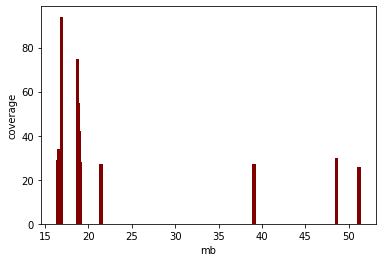

In [73]:
import matplotlib.pyplot as plt  


list_pos1=[i/1e6 for i in list_pos]
plt.bar(list_pos1,list1_depth, color ='maroon', width = .4)
#plt.show()

plt.xlabel("mb")

plt.ylabel("coverage")

plt.savefig("Coverage_.pdf")


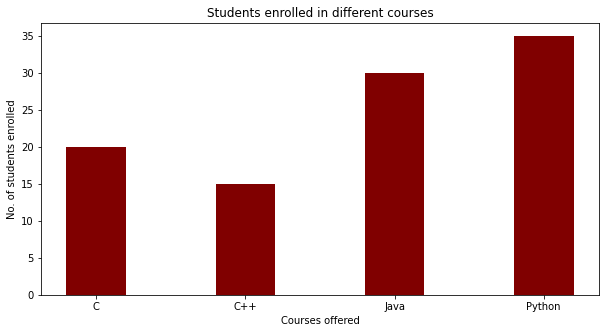

In [59]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
# creating the dataset 
data = {'C':20, 'C++':15, 'Java':30,  
        'Python':35} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 
